In [109]:
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import sys,re
sys.path.append('../')
from lib.visualization import * 
sermons_metadata = pd.read_csv("../assets/sermons.csv")
sermons = sermons_metadata["id"]
dates = sermons_metadata["date"]
authors = sermons_metadata["authors"]

In [110]:
def visualize(x,y,title,xlabel,ylabel,color):
    plt.figure(figsize = (15, 10))
    plt.bar(x,y,color=color)
    plt.title(title, fontsize=20)
    plt.xlabel(xlabel, fontsize=15)
    plt.xticks(np.arange(min(x), max(x)+1, 10.0), fontsize=12)
    plt.ylabel(ylabel, fontsize=15)
    plt.yticks(fontsize=10)
    plt.show()

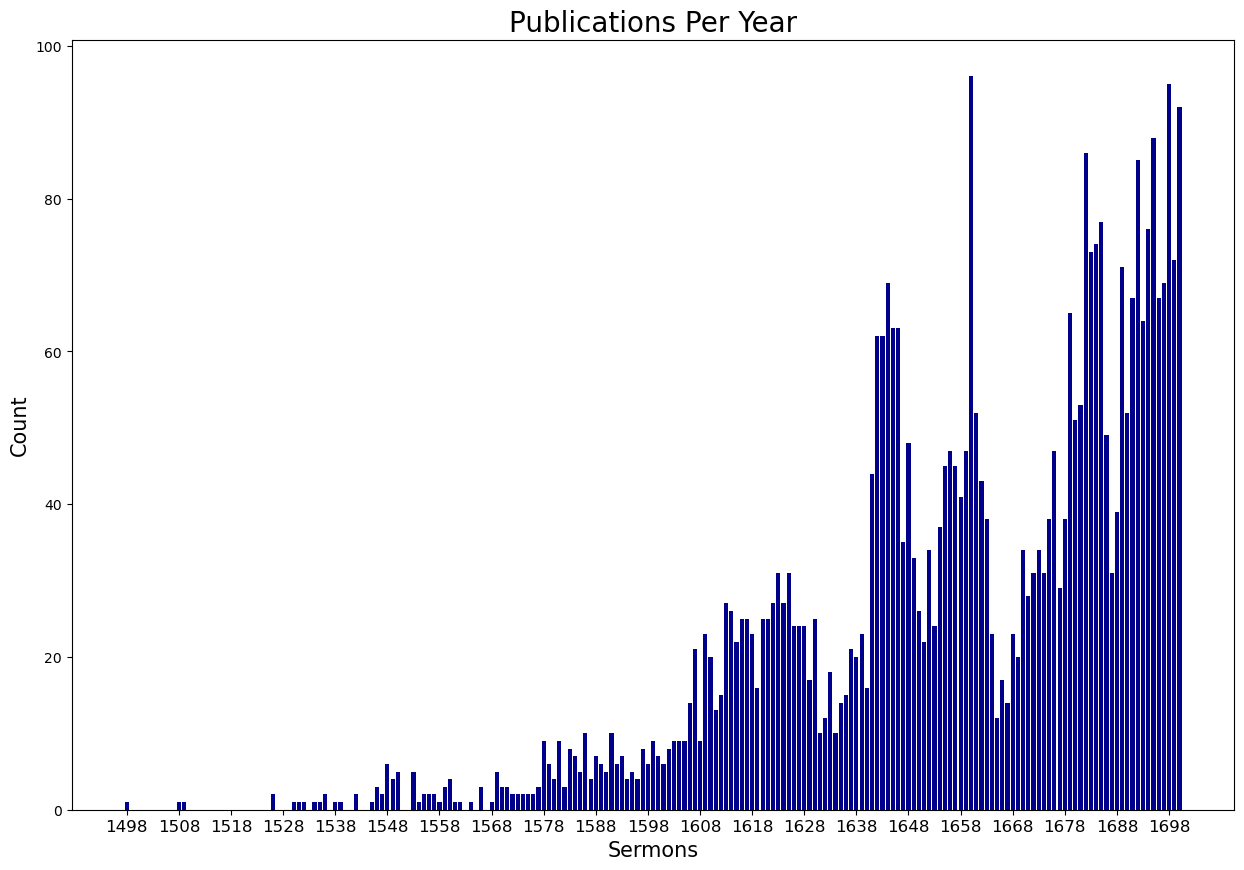

In [112]:
x,y = [],[]
date_counts = Counter(dates)
for date in sorted(date_counts): 
    if "?" in date: continue
    if "-" in date: 
        date = date.split("-")[0]
    if int(date) > 1700: continue
    x.append(int(date))
    y.append(date_counts[date])
visualize(x,y,'Publications Per Year','Sermons','Count','darkblue')

In [113]:
posthumous = defaultdict(list)
within = defaultdict(list)
for idx, tcpID in enumerate(sermons): 
    date = dates[idx]
    aut = authors[idx].split("; ")
    if "?" in date: continue
    for author in aut: 
        if "England and Wales" in author or "House" in author: 
            within[date].append(tcpID)
            break
        elif author == "Anonymous": 
            break
        elif re.search(r"d. \d+",author): 
            yod = re.findall(r"d. (\d+)",author)[0]
            if date <= yod:
                within[date].append(tcpID)
        elif re.search(r'\d+[?]{0,1}-\d+[?]{0,1}',author): 
            years = re.findall('\d+',author)
            if date <= years[-1]: 
                within[date].append(tcpID)
            else: 
                posthumous[date].append(tcpID)

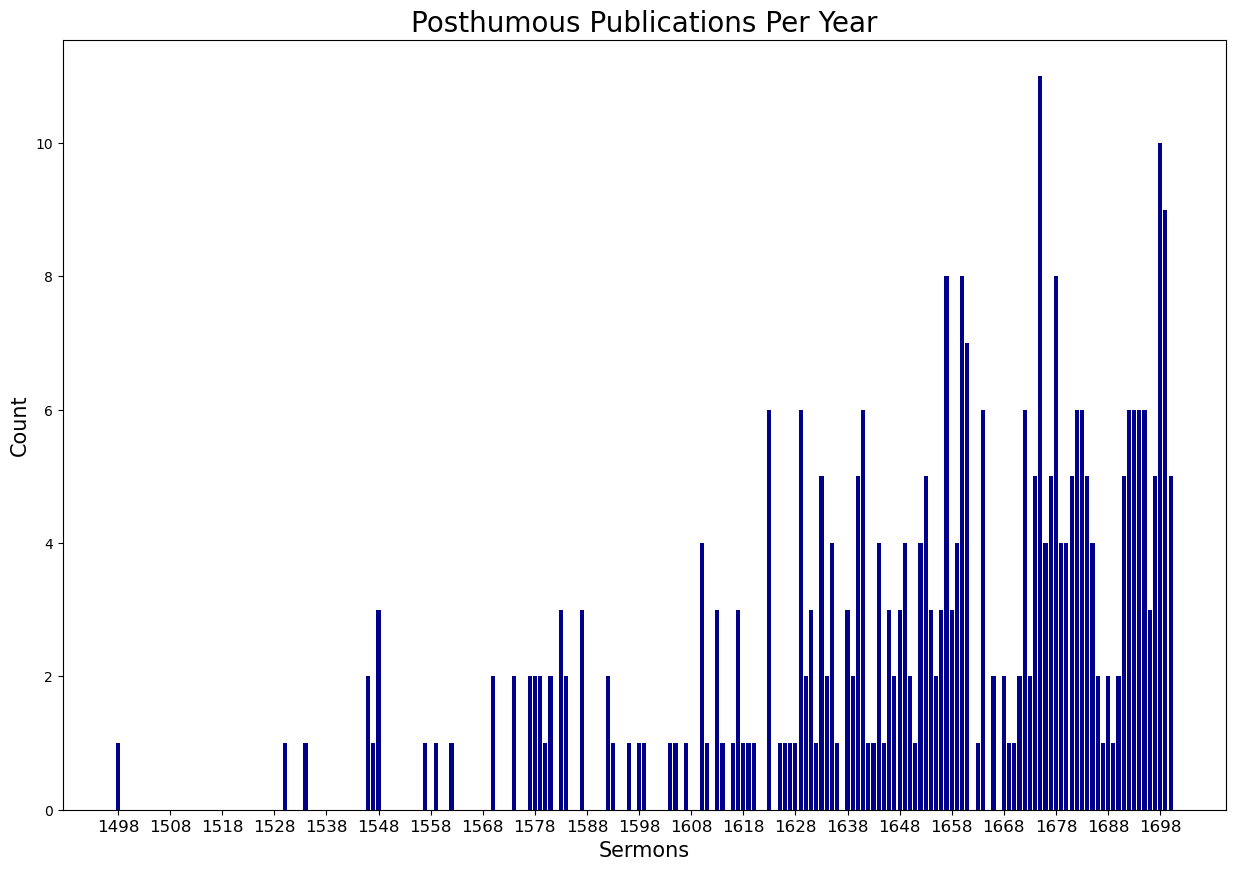

In [116]:
x,y = [],[]
date_counts = {date: len(tcpIDs) for date, tcpIDs in Counter(posthumous).items()}
for date in sorted(date_counts): 
    if "?" in date: continue
    if "-" in date: 
        date = date.split("-")[0]
    if int(date) > 1700: continue
    x.append(int(date))
    y.append(date_counts[date])
visualize(x,y,'Posthumous Publications Per Year','Sermons','Count','darkblue')

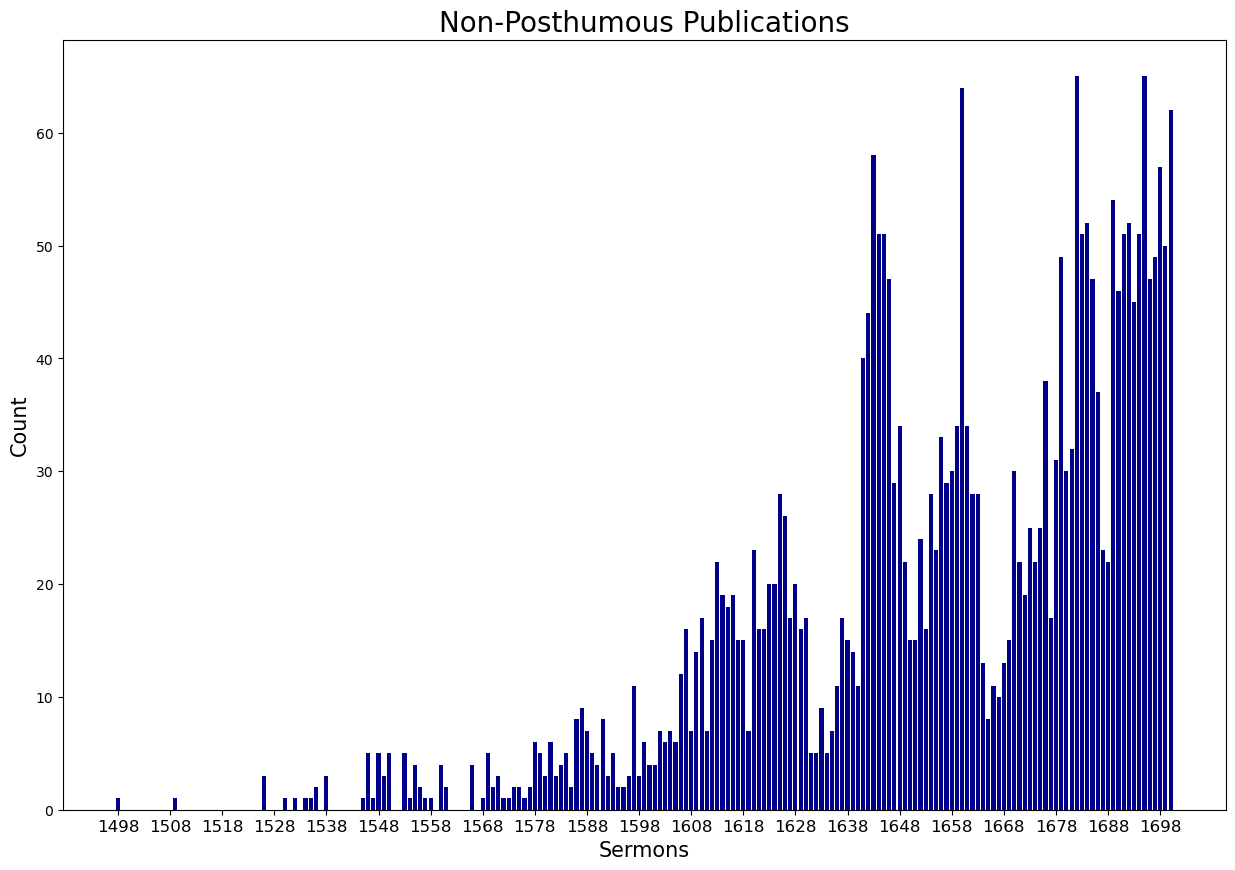

In [117]:
x,y = [],[]
date_counts = {date: len(tcpIDs) for date, tcpIDs in Counter(within).items()}
for date in sorted(date_counts): 
    if "?" in date: continue
    if "-" in date: 
        date = date.split("-")[0]
    if int(date) > 1700: continue
    x.append(int(date))
    y.append(date_counts[date])
visualize(x,y,'Non-Posthumous Publications','Sermons','Count','darkblue')

In [118]:
x,y = [],[]
author_pubs = defaultdict(list)
for idx, author in enumerate(authors): 
    aut = author.split("; ")
    for a in aut: 
        if re.search(r'\w+[\)]{0,},',a):
            additional = re.findall(r'\d+\.([\w+\-\,\s+\.]+)',a)
            if len(additional) > 0: 
                a = re.sub(additional[0], "",a)
        else:
            if "England and Wales. Parliament. House of Commons." in a: 
                a = "England and Wales. Parliament. House of Commons."
        author_pubs[a].append(dates[idx])

In [ ]:
prefixes = {}
for a in author_pubs: 
    prefix = a.split(" ")[:2]
    prefix = " ".join(prefix)
    if prefix not in prefixes: 
        prefixes[prefix] = []
    if a not in prefixes[prefix]: 
        prefixes[prefix].append(a)

for prefix, p_list in prefixes.items(): 
    if len(p_list) > 1: 
        print(prefix, p_list)

In [131]:
author_counts = {aut: len(pubs) for aut, pubs in author_pubs.items()}
for aut,freq in sorted(author_counts.items(), key = lambda x: x[1],reverse=True): 
    print(freq, "\t", aut, "\t", Counter(author_pubs[aut]))

41 	 Anonymous 	 Counter({'1663': 4, '1660': 2, '1672': 2, '1585': 2, '1643': 2, '1698': 2, '1688': 2, '1683': 2, '1673': 1, '1611': 1, '1675': 1, '1687': 1, '1662': 1, '1678': 1, '1645': 1, '1641': 1, '1689': 1, '1542': 1, '1559': 1, '1704': 1, '1670': 1, '1699': 1, '1644': 1, '1671': 1, '1674': 1, '1680': 1, '1607': 1, '1635': 1, '1548': 1, '1667': 1, '1684': 1})
36 	 Tillotson, John, 1630-1694. 	 Counter({'1700': 4, '1694': 4, '1679': 3, '1695': 3, '1678': 2, '1698': 2, '1692': 2, '1682': 2, '1676': 1, '1691': 1, '1687': 1, '1675': 1, '1664': 1, '1696': 1, '1680': 1, '1693': 1, '1689': 1, '1697': 1, '1685': 1, '1681': 1, '1699': 1, '1686': 1})
30 	 Burnet, Gilbert, 1643-1715. 	 Counter({'1689': 7, '1691': 3, '1690': 3, '1675': 3, '1684': 2, '1681': 2, '1697': 2, '1694': 2, '1700': 1, '1680': 1, '1695': 1, '1698': 1, '1692': 1, '1678': 1})
25 	 Stillingfleet, Edward, 1635-1699. 	 Counter({'1700': 2, '1669': 2, '1681': 2, '1697': 2, '1694': 2, '1693': 1, '1692': 1, '1673': 1, '1682': 